---

# University of Wisconsin Eau Claire Capstone Python Code

# Patrick Hearin Ph.D.




---

This notebook contains the entire code for the Capstone submitted for Patrick Hearin's Ph.D Master degree in Data Science.

There is a brief description about the code but the full explanation can be found in the Capstone.

The final version of the Capstone project is included with this notebook.

---

## Chapter 2 Literature Review

This literature review goes over the basics of the calculations that will be used in this Capstone. The code in this chapter was used to produce the content for chapter 2 of the Capstone
.

### Section: Grayscale and Color Basics

In this section the basics of greyscale being one dimensional and rgb being a three dimensional tensor are shown.

---

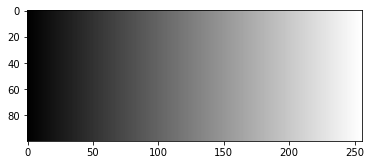

In [1]:
import numpy as np       # Import the libraries needed.
import matplotlib.pyplot as plt

im = np.arange(256)	 # Create a numpy array with 256 entries.
im = im[np.newaxis,:] # Make the array two dimensional.
im = np.repeat(im,100,axis=0) # Make 100 entries on the new axis.

plt.imshow(im,cmap='gray') # Plot the image.

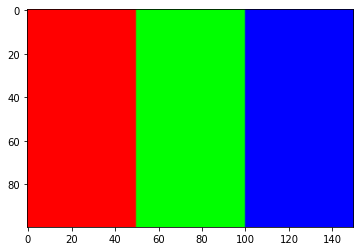

In [2]:
# Create a numpy array of 100 entries.
rgb = np.zeros((100,150,3), dtype='uint8') 
rgb[:,0:50,0] = 255 # red channel
rgb[:,50:100,1] = 255 #green channel
rgb[:,100:150,2] = 255 #blue channel
 
plt.imshow(rgb)

### Section Image Transformations

In this section the basics of transformations on images will be reviewed to introduce the conceps of Convolutional Neural Networks.

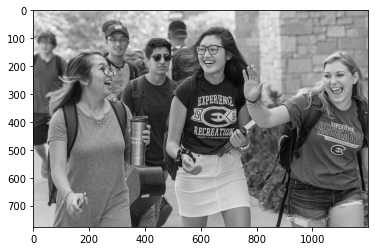

In [3]:
# The following picture will be used as an example.

import cv2

I_sw = cv2.imread('students-walking.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(I_sw,cmap='gray')

In [4]:
def bilinearInterpolate(r,c,I):
# This functions calculates the interpolated value
# using the row r, column c, and intensity I of the given pixel.
    lc = int(c)	 # Calculate the weights.
    rc = lc+1
    wr = c - lc
    wl = rc - c
    tr = int(r)
    br = tr+1
    wt = br-r
    wb = r-tr
# Check if the points are inside the image.
    if tr >= 0 and br < I.shape[0] and lc >=0 and rc < I.shape[1]:
		# Calculate the final intensity.
        a = wl*I[tr,lc] + wr*I[tr,rc]
        b = wl*I[br,lc] + wr*I[br,rc]
        g = wt*a + wb*b
        return np.uint8(g)
    else:
        return 0

In [5]:
# This function calculates the corners of the image such that when rotated the image is still visible.

def corner_points(T,rMax,cMax):
    Cords = np.array([[0,0],[0,cMax-1],[rMax-1,0],[rMax-1,cMax-1]])
    A_dash = T.dot(Cords.T)
    mins = A_dash.min(axis=1)
    maxs = A_dash.max(axis=1)
    minR = np.int64(np.floor(mins[0]))
    minC = np.int64(np.floor(mins[1]))
    maxR = np.int64(np.ceil(maxs[0]))
    maxC = np.int64(np.ceil(maxs[1]))
    H,W = maxR-minR+1, maxC-minC+1
    return minR,minC,maxR,maxC,H,W

In [6]:
# This defines the angle for which the image will be rotated.

a = 45
ca = np.cos(np.deg2rad(a))
sa = np.sin(np.deg2rad(a))
T = np.array([[ca,-sa],[sa,ca]])

In [7]:
# This function uses the previously defined function to rotated the image by transforming the pixels.

def f_transform(T,I_gray):
    rMax,cMax = I_gray.shape[0],I_gray.shape[1]
    minR,minC,maxR,maxC,H,W = corner_points(T,rMax,cMax)
    I2 = np.zeros((H,W),dtype='uint8')
    Tinv = np.linalg.inv(T)
	#Iterate over all the columns and range.
    for new_i in range(minR,maxR):
        for new_j in range(minC,maxC):
            P_dash = np.array([new_i,new_j])
            P = Tinv.dot(P_dash)
            i , j = P[0] , P[1]
            if i < 0 or i>=rMax or j<0 or j>=cMax:
                pass
            else:
                g = bilinearInterpolate(i,j,I_gray)
                I2[new_i-minR,new_j-minC] = g
    return I2



In [8]:
# Apply the function.

I2 = f_transform(T,I_sw)

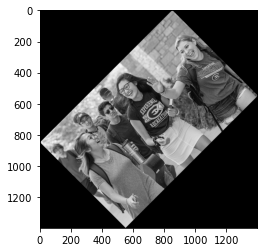

In [9]:
# Plot the final rotated image.

plt.imshow(I2,cmap='gray')

### Section Basic Object Detection

This section will calculate a couple examples of pre-trained object detection.

First the Open CV library will be used to to facial recognition.

Then the YOLO object detection library will be used to do more general object detection.


In [10]:
# Import the Open CV library and a couple more for the first example.

import cv2
import matplotlib.pyplot as plt
import numpy as np
import cvlib as cv # pip install cvlib
from cvlib.object_detection import draw_bbox

In [11]:
# The library cvlib might need to be installed to complete this calculation.

# !pip install cvlib

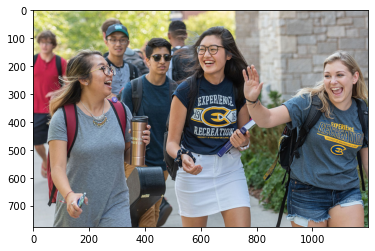

In [12]:
# First load and display the image.

I_sw_2 = cv2.imread(r'students-walking.jpg')

plt.imshow(I_sw_2[:,:,::-1])

In [13]:
# Calculate the bounding box and the confidence levels.

bbox , conf = cv.detect_face(I_sw_2)

In [14]:
# Print the labels on the image.

labels = []
for i in range(len(conf)):
    labels.append('person')



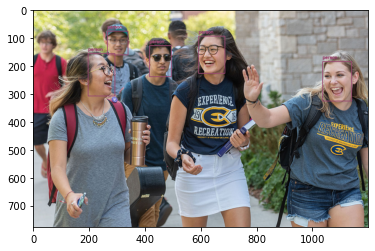

In [15]:
# Draw the bounding box.

im2 = draw_bbox(I_sw_2,bbox,labels,conf)
plt.imshow(im2[:,:,::-1])

### Section Deep Learning Example

In [16]:
# This example will use the PyTorch library to calculate a non-linear model.

import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [17]:
# Create some random non-linear data.

n_pts = 500
centers =[[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_circles(n_samples=n_pts, random_state=123,
 noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data= torch.Tensor(y.reshape(500,1))

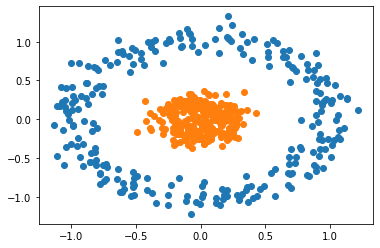

In [18]:
# Plot the data.

plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [19]:
# Define the class with the nn module.

class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [20]:
# Train the model.


torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:", "loss", loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]
epoch: loss 0.7148520350456238
epoch: loss 0.6947316527366638
epoch: loss 0.6955162286758423
epoch: loss 0.7014890313148499
epoch: loss 0.7013982534408569
epoch: loss 0.697470486164093
epoch: loss 0.693925678730011
epoch: loss 0.6928598284721375
epoch: loss 0.6939383149147034
epoch: loss 0.6954388618469238
epoch: loss 0.6958757042884827
epoch: loss 0.6949177384376526
epoch: loss 0.6931492686271667
epoch: loss 0.6913899183273315
epoch: loss 0.6901612281799316
epoch: loss 0.6894590258598328
epoch: loss 0.688843309879303
epoch: loss 0.687766969203949
epoch: loss 0.6859007477760315
epoch: loss 0.683248

Text(0.5, 0, 'epoch')

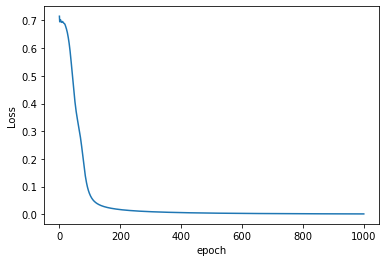

In [21]:
# Plot the loss of the model.

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

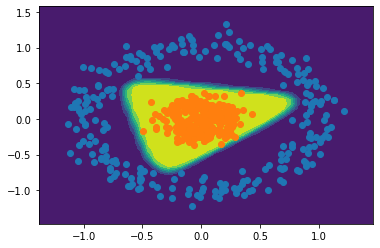

In [22]:
# Plot how the model classifies the non-linear data.

# The triangle is the model and classifies the two data groups.


def plot_decision_boundary(X,y):
    x_span = np.linspace(min(X[:, 0])-0.25, max(X[:, 0])+0.25)
    y_span = np.linspace(min(X[:, 1])-0.25, max(X[:, 1])+0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

plot_decision_boundary(X,y)
plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])


## Section: Object Detection

This section will outline the calculation of using the pre-trained YOLO object detection system to detect objects from a picture of the University of Wisconsin Eau-Claire.

This will be useful later after the custom model is trained for evaluating it.

Note that this section uses the files: Eau_Claire.jpg, yolov3.cfg, and yolov3.weights.

The yolo files are pre-trained and later these will just be replaced by the custom trained files.

In [23]:
# Load the following libraries.

import numpy as  np
import cv2
import matplotlib.pyplot as plt

In [24]:
# Load in the image and calculate the height and width.

img_to_detect = cv2.imread('Eau_Claire.jpg')
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]

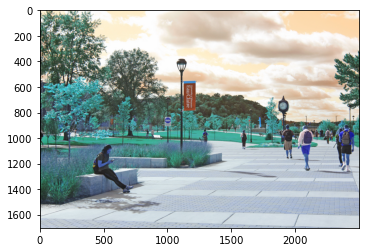

In [25]:
# Plot the image.

plt.imshow(img_to_detect)

In [26]:
# Make a blob from the image.

img_blob = cv2.dnn.blobFromImage(img_to_detect, 0.003922, (416, 416), swapRB=True, crop=False)

In [27]:
# The code block sets up all the different things the pre-trained algorithm can detect.

# It also defines all the different colors the bounding box can be.

# The pre-trained files are also uploaded.

class_labels = ["person","bicycle","car","motorcycle","airplane","bus","train","truck","boat",
                "trafficlight","firehydrant","stopsign","parkingmeter","bench","bird","cat",
                "dog","horse","sheep","cow","elephant","bear","zebra","giraffe","backpack",
                "umbrella","handbag","tie","suitcase","frisbee","skis","snowboard","sportsball",
                "kite","baseballbat","baseballglove","skateboard","surfboard","tennisracket",
                "bottle","wineglass","cup","fork","knife","spoon","bowl","banana","apple",
                "sandwich","orange","broccoli","carrot","hotdog","pizza","donut","cake","chair",
                "sofa","pottedplant","bed","diningtable","toilet","tvmonitor","laptop","mouse",
                "remote","keyboard","cellphone","microwave","oven","toaster","sink","refrigerator",
                "book","clock","vase","scissors","teddybear","hairdrier","toothbrush"]

#Declare List of colors as an array
#Green, Blue, Red, cyan, yellow, purple
#Split based on ',' and for every split, change type to int
#convert that to a numpy array to apply color mask to the image numpy array
class_colors = ["0,255,0","0,0,255","255,0,0","255,255,0","0,255,255"]
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
class_colors = np.array(class_colors)
class_colors = np.tile(class_colors,(16,1))

# Loading pretrained model 
# input preprocessed blob into model and pass through the model
# obtain the detection predictions by the model using forward() method
yolo_model = cv2.dnn.readNetFromDarknet('data-files/yolov3.cfg','data-files/yolov3.weights')

# Get all layers from the yolo network
# Loop and find the last layer (output layer) of the yolo network 
yolo_layers = yolo_model.getLayerNames()
yolo_output_layer = [yolo_layers[yolo_layer - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]

# input preprocessed blob into model and pass through the model
yolo_model.setInput(img_blob)
# obtain the detection layers by forwarding through till the output layer
obj_detection_layers = yolo_model.forward(yolo_output_layer)


In [28]:
class_ids_list = []
boxes_list = []
confidences_list = []


# loop over each of the layer outputs
for object_detection_layer in obj_detection_layers:
	# loop over the detections
    for object_detection in object_detection_layer:
        
        # obj_detections[1 to 4] => will have the two center points, box width and box height
        # obj_detections[5] => will have scores for all objects within bounding box
        all_scores = object_detection[5:]
        predicted_class_id = np.argmax(all_scores)
        prediction_confidence = all_scores[predicted_class_id]
    
        # take only predictions with confidence more than 20%
        if prediction_confidence > 0.20:
            #get the predicted label
            predicted_class_label = class_labels[predicted_class_id]
            #obtain the bounding box co-oridnates for actual image from resized image size
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            start_x_pt = int(box_center_x_pt - (box_width / 2))
            start_y_pt = int(box_center_y_pt - (box_height / 2))
            
            
            class_ids_list.append(predicted_class_id)
            confidences_list.append(float(prediction_confidence))
            boxes_list.append([start_x_pt, start_y_pt, int(box_width), int(box_height)])
            
            

max_value_ids = cv2.dnn.NMSBoxes(boxes_list, confidences_list, 0.5, 0.4)

# loop through the final set of detections remaining after NMS and draw bounding box and write text
for max_valueid in max_value_ids:
    max_class_id = max_valueid
    box = boxes_list[max_class_id]
    start_x_pt = box[0]
    start_y_pt = box[1]
    box_width = box[2]
    box_height = box[3]
    
    #get the predicted class id and label
    predicted_class_id = class_ids_list[max_class_id]
    predicted_class_label = class_labels[predicted_class_id]
    prediction_confidence = confidences_list[max_class_id]

           
    end_x_pt = start_x_pt + box_width
    end_y_pt = start_y_pt + box_height
    
    #get a random mask color from the numpy array of colors
    box_color = class_colors[predicted_class_id]
    
    #convert the color numpy array as a list and apply to text and box
    box_color = [int(c) for c in box_color]
    
    # print the prediction in console
    predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
    print("predicted object {}".format(predicted_class_label))
    
    # draw rectangle and text in the image
    cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
    cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

# cv2.imshow("Detection Output", img_to_detect)


predicted object person: 99.95%
predicted object person: 99.87%
predicted object person: 99.81%
predicted object person: 99.62%
predicted object person: 98.73%
predicted object person: 96.43%
predicted object clock: 88.75%
predicted object person: 87.91%
predicted object person: 86.24%
predicted object person: 83.48%


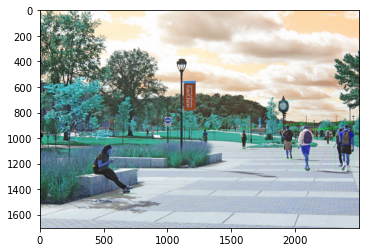

In [29]:
plt.imshow(img_to_detect)

## Chapter 3 Methodology

### Section Image Pre-Processing

The following link will take you to the code that creates images that can be used to train a deep learning algorithm. Since it takes a decent amount of computer vision code to produce those images that code is just referenced here such that this notebook can proceed in producing the final results for the capstone.


https://www.kaggle.com/code/robikscube/mayo-clinic-image-dataset-1024-jpg

In [30]:
# This code puts all of the different images into two different files for each of the strokes.

# with open('classes_types.csv', newline='') as csvfile:
#     linereader = csv.reader(csvfile, delimiter=',')
#     for row in linereader:
#         name = row[0]
#         type = row[4]
#         if type == 'CE':
#             try:
#                 os.rename( 'train1/'+ name +'.png', 'train1/CE/' + name+'.png')
#                 print(name + " moved to CE folder.")
#             except FileNotFoundError:
#                 pass # Not found in train1
#         else:
#             try:
#                 os.rename( 'train1/'+ name +'.png', 'train1/LAA/' + name+'.png')
#                 print(name + " moved to LAA folder.")
#             except FileNotFoundError:
#                 pass # Not found in train1

### Section Image Classification
#### Tenserflow Baseline Model

In [31]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [32]:
#construct an instance of ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale = 1
)
test_datagen = ImageDataGenerator(
    rescale = 1
)

In [33]:
#construct an instance of ImageDataGenerator class
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
brightness_range=[0.2,2.0],
horizontal_flip=True,
fill_mode='nearest')

In [34]:
#prepare iterators to loop through each and every image
training_iterator = train_datagen.flow_from_directory('data-files/train1', batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('data-files/test1/', batch_size=64, target_size=(100,100))


Found 602 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [35]:
#defining the sequential model for multiclass classification
model = keras.Sequential()

In [36]:
# Defining the CNN layers
model.add(layers.Conv2D(32, (3,3), activation='relu',
 input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(2, activation='sigmoid'))

In [37]:

#Compile and fit the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator,validation_data = testing_iterator, epochs=12)

Epoch 1/12
10/10 [==============================] - 16s 2s/step - loss: 239.3797 - accuracy: 0.6262 - val_loss: 8.9318 - val_accuracy: 0.2733
Epoch 2/12
10/10 [==============================] - 6s 605ms/step - loss: 1.8839 - accuracy: 0.6130 - val_loss: 1.7677 - val_accuracy: 0.2733
Epoch 3/12
10/10 [==============================] - 6s 580ms/step - loss: 0.8627 - accuracy: 0.5897 - val_loss: 0.6397 - val_accuracy: 0.7267
Epoch 4/12
10/10 [==============================] - 6s 568ms/step - loss: 0.6955 - accuracy: 0.6960 - val_loss: 0.9559 - val_accuracy: 0.7267
Epoch 5/12
10/10 [==============================] - 6s 595ms/step - loss: 1.0424 - accuracy: 0.6030 - val_loss: 1.8523 - val_accuracy: 0.7267
Epoch 6/12
10/10 [==============================] - 6s 582ms/step - loss: 1.0918 - accuracy: 0.6229 - val_loss: 0.8091 - val_accuracy: 0.7133
Epoch 7/12
10/10 [==============================] - 6s 642ms/step - loss: 0.5897 - accuracy: 0.7226 - val_loss: 0.6878 - val_accuracy: 0.7067
Epoch 

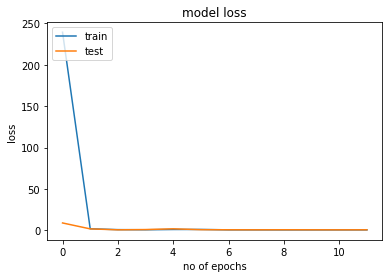

In [38]:
import matplotlib.pyplot as plt

#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

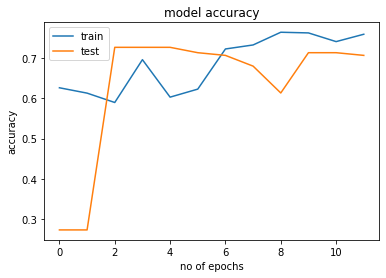

In [39]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

### Section: TenserFlow Optimization

This section uses image optimization to try to find better metrics for the the baseline model that was trained in the last section.

In [40]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [41]:
#construct an instance of ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)


test_datagen = ImageDataGenerator(
    rescale = 1/255,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

In [42]:
#defining the sequential model for multiclass classification
model = keras.Sequential()

In [43]:
# Defining the CNN layers
model.add(layers.Conv2D(32, (3,3),\
activation='relu', input_shape=(100,100,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3),\
 activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(128, (3,3),\
 activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

In [44]:
#prepare iterators to loop through each and every image
training_iterator = train_datagen.flow_from_directory('data-files/train1/'\
, batch_size=64, target_size=(100,100))
testing_iterator = test_datagen.flow_from_directory('data-files/test1/'\
, batch_size=64, target_size=(100,100))

Found 602 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [45]:
#Compile and fit the model
model.compile(loss='categorical_crossentropy',\
 metrics=['accuracy'], optimizer='adam')
history = model.fit(training_iterator,\
 validation_data = testing_iterator, epochs=8)

Epoch 1/8
10/10 [==============================] - 10s 953ms/step - loss: 0.7948 - accuracy: 0.5980 - val_loss: 0.5881 - val_accuracy: 0.7267
Epoch 2/8
10/10 [==============================] - 9s 860ms/step - loss: 0.6048 - accuracy: 0.7259 - val_loss: 0.5881 - val_accuracy: 0.7267
Epoch 3/8
10/10 [==============================] - 8s 828ms/step - loss: 0.5936 - accuracy: 0.7259 - val_loss: 0.5883 - val_accuracy: 0.7267
Epoch 4/8
10/10 [==============================] - 9s 850ms/step - loss: 0.5920 - accuracy: 0.7259 - val_loss: 0.5891 - val_accuracy: 0.7267
Epoch 5/8
10/10 [==============================] - 9s 852ms/step - loss: 0.5904 - accuracy: 0.7259 - val_loss: 0.5894 - val_accuracy: 0.7267
Epoch 6/8
10/10 [==============================] - 9s 877ms/step - loss: 0.5938 - accuracy: 0.7259 - val_loss: 0.5921 - val_accuracy: 0.7267
Epoch 7/8
10/10 [==============================] - 9s 857ms/step - loss: 0.5909 - accuracy: 0.7259 - val_loss: 0.5870 - val_accuracy: 0.7267
Epoch 8/8
10

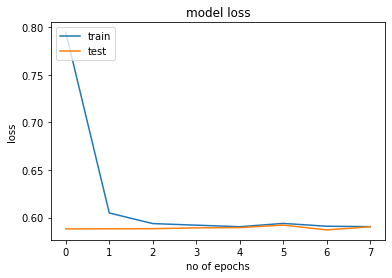

In [46]:
import matplotlib.pyplot as plt

#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

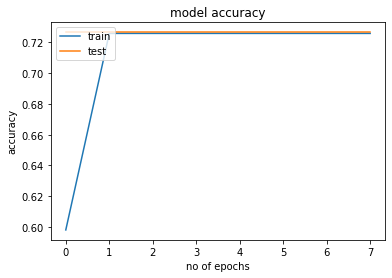

In [47]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()


### Section: Transfer Learning VGG16

This section uses the pre-trained model VGG16 to train a model that hopefully has better metrics.

In [48]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
# import all VGG16 classes
from tensorflow.keras.applications.vgg16 import VGG16\
, preprocess_input, decode_predictions
from tensorflow.keras.models import Model

In [50]:
# construct an instance of the ImageDataGenerator class
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2)

test_datagen = ImageDataGenerator(
    rescale = 1./255)

In [51]:
#To the basic loaded model, 
#we are changing only the final prediction layer.
#include_top set to false will not load the last
# fully-connected output layers
#after last max pooling layer,
# we will manually add a Flatten layer and rest
#if include_top is false we need to specify the input shape 

model = VGG16(include_top=False, input_shape = (224, 224, 3))

In [52]:
# specify the layers loaded as not trainable
for layer in model.layers:
    layer.trainable = False

In [53]:
# Flatten the output layer to 1 dimension
# before starting the fully connected layer
flatten_layer = layers.Flatten()(model.output)

In [54]:
# Add a fully connected layer with 512 hidden
# units and ReLU activation
flattened_fc_layer = layers.Dense(512,\
 activation='relu')(flatten_layer )


In [55]:

# Add the last sigmoid layer for classification
flattened_fc_sigmoid_layer = layers.Dense(2,\
 activation='softmax')(flattened_fc_layer)

In [56]:
# define new model with base
# model and new layers combined
model =  Model(inputs=model.inputs,\
 outputs=flattened_fc_sigmoid_layer)

In [57]:
# summarize the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [58]:
# prepare iterators
training_iterator =\
 train_datagen.flow_from_directory('data-files/train1/',\
 batch_size=64, target_size=(224, 224))
# move around 240 images (30% of 800) from train to test
testing_iterator =\
 test_datagen.flow_from_directory('data-files/test1/',\
 batch_size=64, target_size=(224, 224))


Found 602 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [59]:
# compile model
model.compile(loss = "binary_crossentropy",\
 metrics=['accuracy'], optimizer='adam')


In [60]:
# fit model
history = model.fit(training_iterator,\
 validation_data=testing_iterator, epochs = 2)

Epoch 1/2
10/10 [==============================] - 58s 6s/step - loss: 2.9330 - accuracy: 0.6944 - val_loss: 1.0596 - val_accuracy: 0.4000
Epoch 2/2
10/10 [==============================] - 56s 6s/step - loss: 0.8987 - accuracy: 0.6561 - val_loss: 0.6481 - val_accuracy: 0.6933


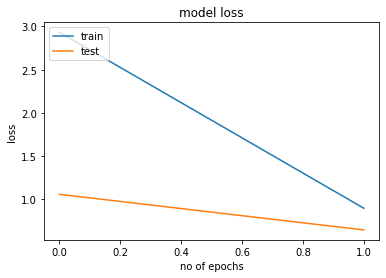

In [61]:
import matplotlib.pyplot as plt

#plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

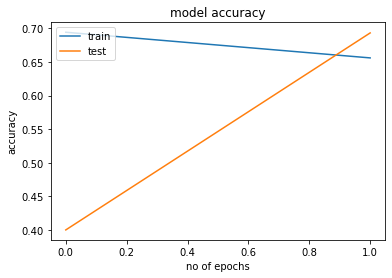

In [62]:
#plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('no of epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

# PyTorch Image Classification

In this section we will do some more image classification model training with PyTorch.

The results of this section will be compared to the TenserFlow results in the capstone paper.

In [63]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models

c:\ProgramData\Anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [64]:
device = torch.device("cuda:0" if torch.cuda.is_available() 
else "cpu")

In [65]:

# Load the data from the train and test folders.

transform = transforms.Compose([transforms.Resize((32,32)),
                               transforms.ToTensor(),
                               transforms.Normalize(
						(0.5, 0.5, 0.5),
					    (0.5, 0.5, 0.5))
                               ])

training_dataset = datasets.ImageFolder('data-files/train1/',
 transform=transform)
validation_dataset = datasets.ImageFolder('data-files/test1/',
 transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, 
batch_size=120, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, 
batch_size = 120, shuffle=False)

In [66]:
# Define the convolutional neural network.

class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
      self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
      self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
      self.fc1 = nn.Linear(4*4*64, 500)
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv3(x))
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*64)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return x

In [67]:
# Load and display the model.

model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [68]:
# Define the loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [69]:
# Train the model.

epochs = 4
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(
val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(
validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, 
	val_epoch_acc.item()))

epoch : 1
training loss: 1.6160, acc 66.6667 
validation loss: 1.4894, validation acc 54.5000 
epoch : 2
training loss: 0.7140, acc 72.8333 
validation loss: 0.8850, validation acc 53.5000 
epoch : 3
training loss: 0.5845, acc 65.3333 
validation loss: 0.9244, validation acc 53.5000 
epoch : 4
training loss: 0.7046, acc 71.8333 
validation loss: 0.8593, validation acc 48.5000 


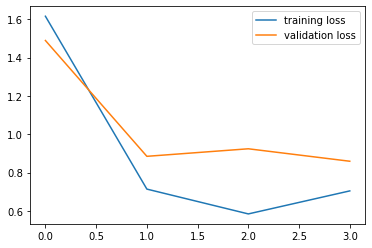

In [70]:
# Plot the loss.

plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

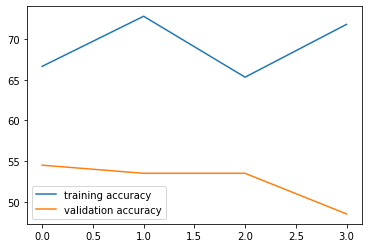

In [71]:
# Plot the accuracy

plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

### Section PyTorch Optimization 

This section uses image augmentation to optimize the metrics in the previous model. 

The code and process is similar to TensorFlow.

These models are explained in the capstone.

In [72]:
# Import the libraries needed.

import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models

In [73]:
# Next load the data set and apply the transformations.

transform_train = transforms.Compose([transforms.Resize((32,32)),                                     
transforms.RandomHorizontalFlip(),                                      
transforms.RandomRotation(10),                                      
transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),                                   
transforms.ColorJitter(brightness=0.2, contrast=0.2,
saturation=0.2),                                      
transforms.ToTensor(),                                      
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


transform = transforms.Compose([transforms.Resize((32,32)),                               
transforms.ToTensor(),                               
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

training_dataset = datasets.ImageFolder('data-files/train1/', transform=transform_train)
validation_dataset = datasets.ImageFolder('data-files/test1/', transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=110, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 110, shuffle=False)

In [74]:
# Next loud the LeNet Model.

class LeNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1)
      self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
      self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
      self.fc1 = nn.Linear(4*4*64, 500)
      self.dropout1 = nn.Dropout(0.5)
      self.fc2 = nn.Linear(500, 10)
    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv2(x))
      x = F.max_pool2d(x, 2, 2)
      x = F.relu(self.conv3(x))
      x = F.max_pool2d(x, 2, 2)
      x = x.view(-1, 4*4*64)
      x = F.relu(self.fc1(x))
      x = self.dropout1(x)
      x = self.fc2(x)
      return x

In [75]:
# Define the model.

model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [76]:
# Define the metric and the optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [77]:
# Train the model.

epochs = 3
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(
val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(
validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(
epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))


epoch : 1
training loss: 1.5241, acc 61.1667 
validation loss: 1.6398, validation acc 54.5000 
epoch : 2
training loss: 0.7674, acc 61.0000 
validation loss: 0.7422, validation acc 51.0000 
epoch : 3
training loss: 0.6849, acc 70.6667 
validation loss: 0.9719, validation acc 54.5000 


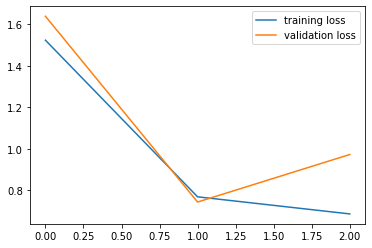

In [78]:
# Plot the loss.

plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

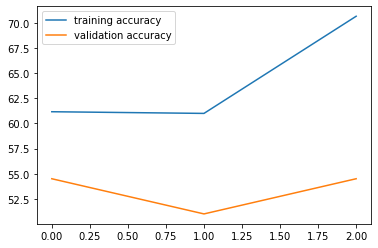

In [79]:
# Plot the accuracy.

plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

### Section: PyTorch Transfer Learning

In this section VGG16 pre-trained model will be used in an attempt to train a model with better metrics than the previous ones.

In [80]:
# Import the libraries required.

import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms, models

In [81]:
# Load the data and transforms

transform_train = transforms.Compose(
[transforms.Resize((224,224)),
transforms.RandomHorizontalFlip(),
transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])


transform = transforms.Compose(
[transforms.Resize((224,224)),
transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

training_dataset = datasets.ImageFolder(
'data-files/train1/', transform=transform_train)
validation_dataset = datasets.ImageFolder(
'data-files/test1/', transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset,
batch_size=20, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, 
batch_size = 20, shuffle=False)

In [82]:
# Load the model.

model = models.vgg16(pretrained=True)

c:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [83]:
# Load the model parameters.

for param in model.features.parameters():
  param.requires_grad = False

In [84]:
# Define loss and optimizer.

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [85]:
# Train the model

epochs = 2
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(
				val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/ len(
			training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(
			validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/ len(
		validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(
		epoch_loss, epoch_acc.item()))
    print(
'validation loss: {:.4f}, validation acc {:.4f} '.format(
val_epoch_loss,
val_epoch_acc.item()))
transform_train = transforms.Compose(
[transforms.Resize((32,32)),                                      
transforms.RandomHorizontalFlip(),                                      
transforms.RandomRotation(10),                                      
transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),                                      
transforms.ToTensor(),                                      
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


transform = transforms.Compose(
[transforms.Resize((32,32)),                              
transforms.ToTensor(),                               
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

training_dataset = datasets.ImageFolder('data-files/train1/',
transform=transform_train)
validation_dataset = datasets.ImageFolder('data-files/test1/', 
transform=transform)

training_loader = torch.utils.data.DataLoader(
training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(
validation_dataset, batch_size = 100, shuffle=False)

epoch : 1
training loss: 0.0820, acc 0.5797 
validation loss: 0.0433, validation acc 0.6200 
epoch : 2
training loss: 0.0379, acc 0.6728 
validation loss: 0.0381, validation acc 0.5867 


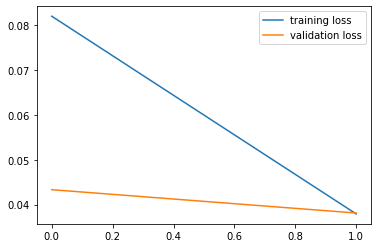

In [86]:
# Plot the loss

plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

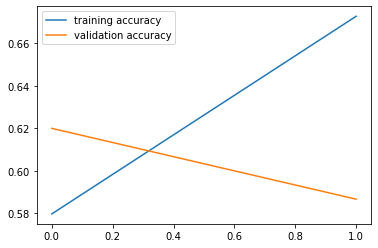

In [87]:
# Plot the accuracy

plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

### Section: Yolo Object Detection.

This section has the scripts to run the custom model on google colab. It can be run from a computer but takes around 12 hours on Google Colab, so it will take longer on a personal computer.

In [88]:
# !unzip "/content/drive/MyDrive/custom_stroke_model/darknet.zip"

In [89]:
# !sudo apt install dos2unix

In [90]:
# cd /content/darknet

In [91]:
# !find . -type f -print0 | xargs  -0 dos2unix|

In [92]:
# !chmod +x /content/darknet

In [93]:
# !make

In [94]:
# !./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

In [95]:
# cp yolov4.cfg /cfg

In [96]:
# !rm /content/darknet/backup -r

In [97]:
# !ln -s /content/drive/'My Drive'/stroke_weights/backup /content/darknet

In [98]:
# !ln -s /content/drive/'My Drive'/stroke_weights/backup /content/darknet

## Chapter 4: Results

This section uses the custom trained weights to show the results of the object detection system trained with the previous code.

In [99]:
# Libraries that are required.

import numpy as  np
import cv2
import matplotlib.pyplot as plt

In [100]:
# Function to display a larger image.

def displayImageInActualSizeColor(I):
    dpi = plt.rcParams['figure.dpi']
    H,W = I.shape[0:2]
    figSize = W/float(dpi) , H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I,cmap='gray')
    plt.show

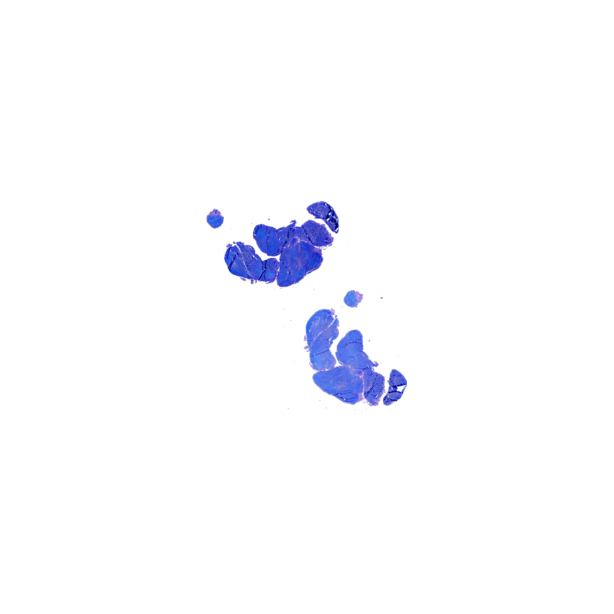

In [101]:
# Display the LAA stroke image.

img_to_detect = cv2.imread('LAA_test2.png')
displayImageInActualSizeColor(img_to_detect)

In [102]:
# Calculate the height and width.

img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]

In [103]:
# This is the same code that was run in Chapter 2 except there are only two class labels.

img_blob = cv2.dnn.blobFromImage(img_to_detect, 0.003922, (416, 416), swapRB=True, crop=False)
#recommended by yolo authors, scale factor is 0.003922=1/255, width,height of blob is 320,320
#accepted sizes are 320×320,416×416,609×609. More size means more accuracy but less speed

# set of 80 class labels 
class_labels = ["LAA", "CE"]

#Declare List of colors as an array
#Green, Blue, Red, cyan, yellow, purpl
#Split based on ',' and for every split, change type to int
#convert that to a numpy array to apply color mask to the image numpy array
class_colors = ["0,255,0","0,0,255"]
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
class_colors = np.array(class_colors)
class_colors = np.tile(class_colors,(2,1))

In [104]:
# Detect the strokes and draw the bounding box.

# The final object detection scores are correct.

# Loading pretrained model 
# input preprocessed blob into model and pass through the model
# obtain the detection predictions by the model using forward() method
yolo_model = cv2.dnn.readNetFromDarknet('data-files/stroke_yolov4.cfg','data-files/stroke_yolov4_best.weights')

# Get all layers from the yolo network
# Loop and find the last layer (output layer) of the yolo network 
yolo_layers = yolo_model.getLayerNames()
yolo_output_layer = [yolo_layers[yolo_layer - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]

# input preprocessed blob into model and pass through the model
yolo_model.setInput(img_blob)
# obtain the detection layers by forwarding through till the output layer
obj_detection_layers = yolo_model.forward(yolo_output_layer)


# loop over each of the layer outputs
for object_detection_layer in obj_detection_layers:
	# loop over the detections
    for object_detection in object_detection_layer:
        
        # obj_detections[1 to 4] => will have the two center points, box width and box height
        # obj_detections[5] => will have scores for all objects within bounding box
        all_scores = object_detection[5:]
        #print(all_scores)
        predicted_class_id = np.argmax(all_scores)
        prediction_confidence = all_scores[predicted_class_id]
    
        # take only predictions with confidence more than 20%
        if prediction_confidence > 0.20:
            #get the predicted label
            predicted_class_label = class_labels[predicted_class_id]
            #obtain the bounding box co-oridnates for actual image from resized image size
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            start_x_pt = int(box_center_x_pt - (box_width / 2))
            start_y_pt = int(box_center_y_pt - (box_height / 2))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height
            
            #get a random mask color from the numpy array of colors
            box_color = class_colors[predicted_class_id]
            
            #convert the color numpy array as a list and apply to text and box
            box_color = [int(c) for c in box_color]
            
            # print the prediction in console
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))
            
            # draw rectangle and text in the image
            cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

# cv2.imshow("Detection Output", img_to_detect)


predicted object LAA: 58.61%
predicted object LAA: 58.36%
predicted object LAA: 67.59%
predicted object LAA: 61.45%
predicted object LAA: 97.75%
predicted object LAA: 95.82%
predicted object LAA: 42.84%


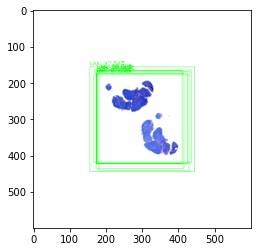

In [105]:
# Plot the final image with the bounding box.

plt.imshow(img_to_detect)